In [1]:
import pandas as pd
import numpy as np
from statsmodels.api import add_constant
from sklearn.preprocessing import OneHotEncoder
import pyreadstat as pt
pd.options.display.max_columns = None
from linearmodels import PanelOLS
from linearmodels import RandomEffects
from linearmodels import PooledOLS
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.linear_model import LinearRegression
import pyreadstat as pt
from scipy.stats import sem
from scipy.stats import ttest_1samp
import statistics
import scipy.stats as st
from statsmodels.stats.diagnostic import het_white
import statsmodels.formula.api as sm
from linearmodels.panel import PanelOLS

# Disable all warnings
warnings.filterwarnings("ignore")

In [2]:
df, meta= pt.read_dta("/Users/anuraggupta/Library/CloudStorage/OneDrive-TheUniversityofTexasatDallas/UTD/Academics/Fall'23/Econometrics/Group Project/guns.dta")
df.head()

,year,vio,mur,rob,incarc_rate,pb1064,pw1064,pm1029,pop,avginc,density,stateid,shall
0,77,414.399994,14.2,96.800003,83,8.384873,55.122906,18.174412,3.780403,9.563148,0.074552,1,0
1,78,419.100006,13.3,99.099998,94,8.352101,55.143665,17.994080,3.831838,9.932000,0.075567,1,0
2,79,413.299988,13.2,109.500000,144,8.329575,55.135857,17.839336,3.866248,9.877028,0.076245,1,0
3,80,448.500000,13.2,132.100006,141,8.408386,54.912586,17.734198,3.900368,9.541428,0.076829,1,0
4,81,470.500000,11.9,126.500000,149,8.483435,54.925125,17.673716,3.918531,9.548351,0.077187,1,0


array([[<Axes: title={'center': 'vio'}>, <Axes: title={'center': 'mur'}>,
        <Axes: title={'center': 'rob'}>],
       [<Axes: title={'center': 'incarc_rate'}>,
        <Axes: title={'center': 'pb1064'}>,
        <Axes: title={'center': 'pw1064'}>],
       [<Axes: title={'center': 'pm1029'}>,
        <Axes: title={'center': 'pop'}>,
        <Axes: title={'center': 'avginc'}>],
       [<Axes: title={'center': 'density'}>, <Axes: >, <Axes: >]],
      dtype=object)

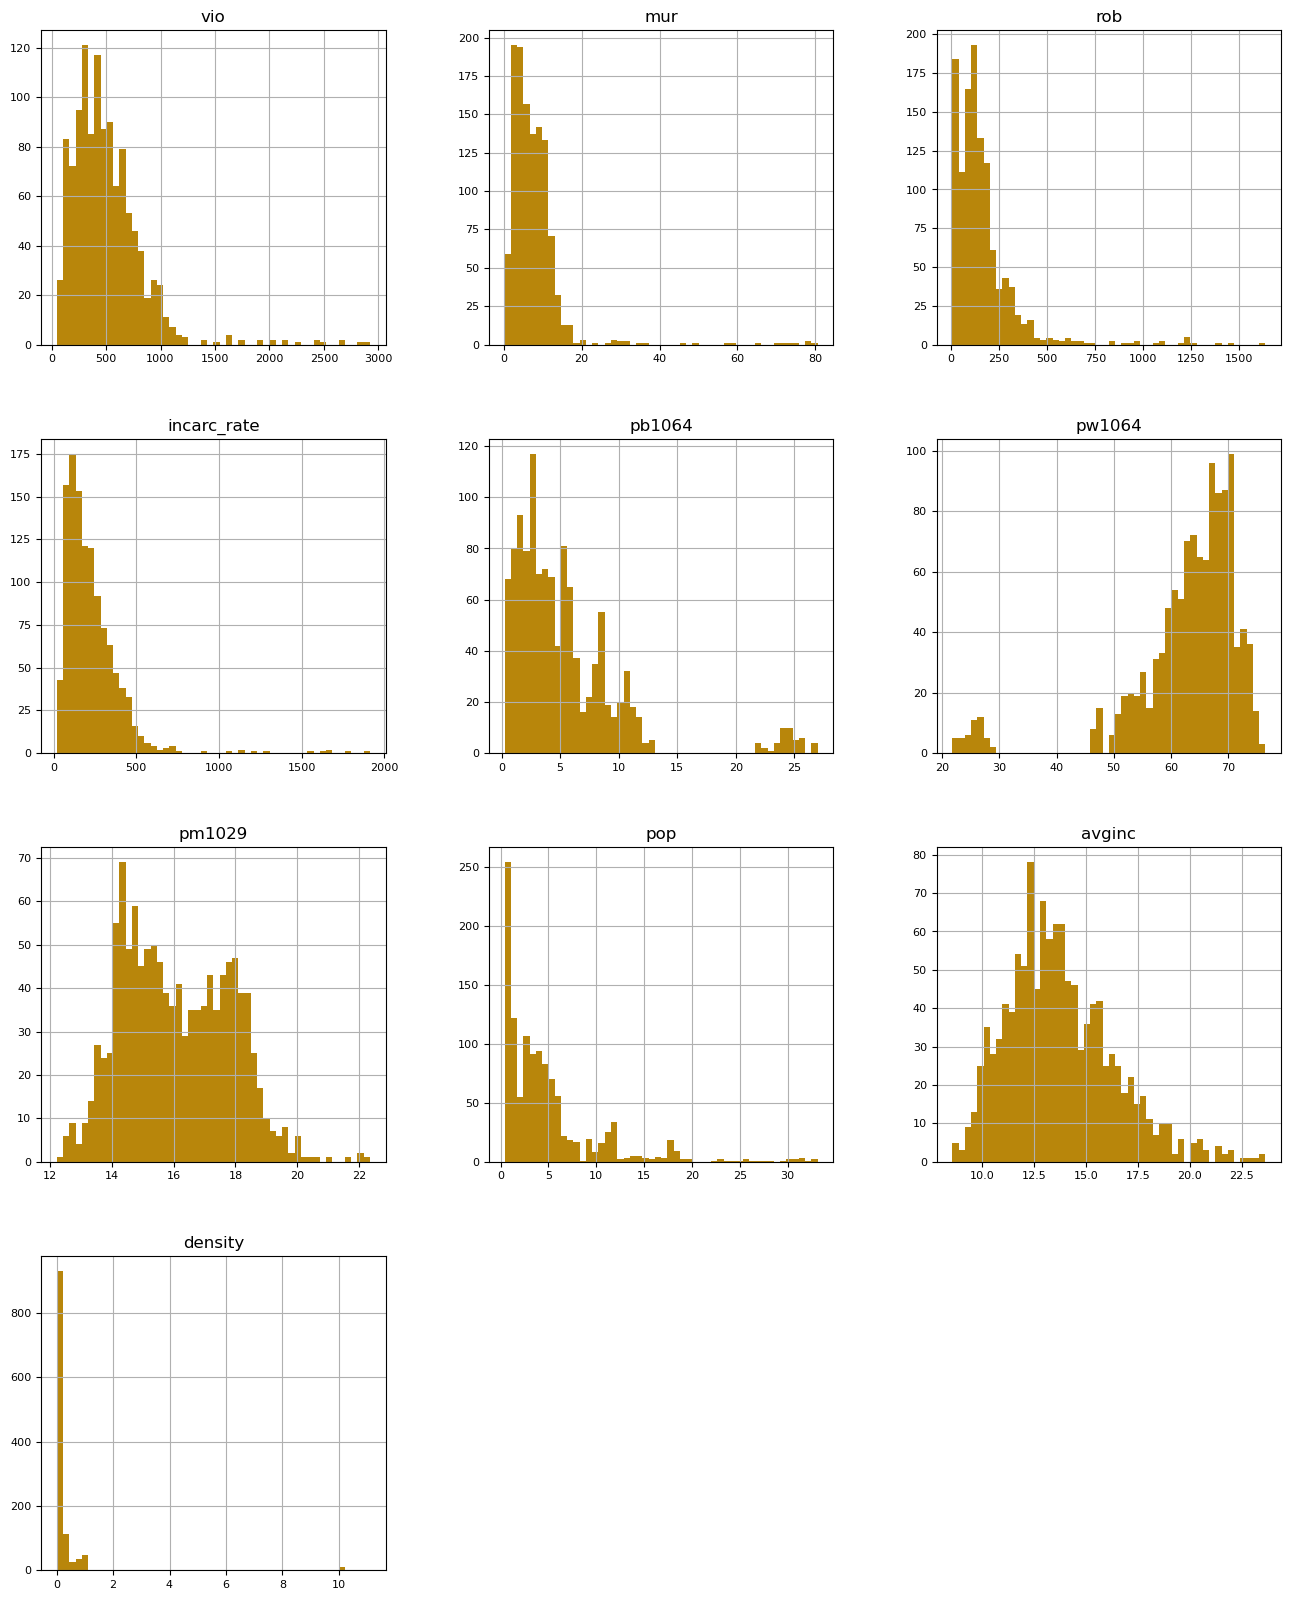

In [3]:
df[['vio', 'mur', 'rob', 'incarc_rate', 'pb1064','pw1064','pm1029','pop','avginc', 'density']].hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8, color= 'darkgoldenrod')

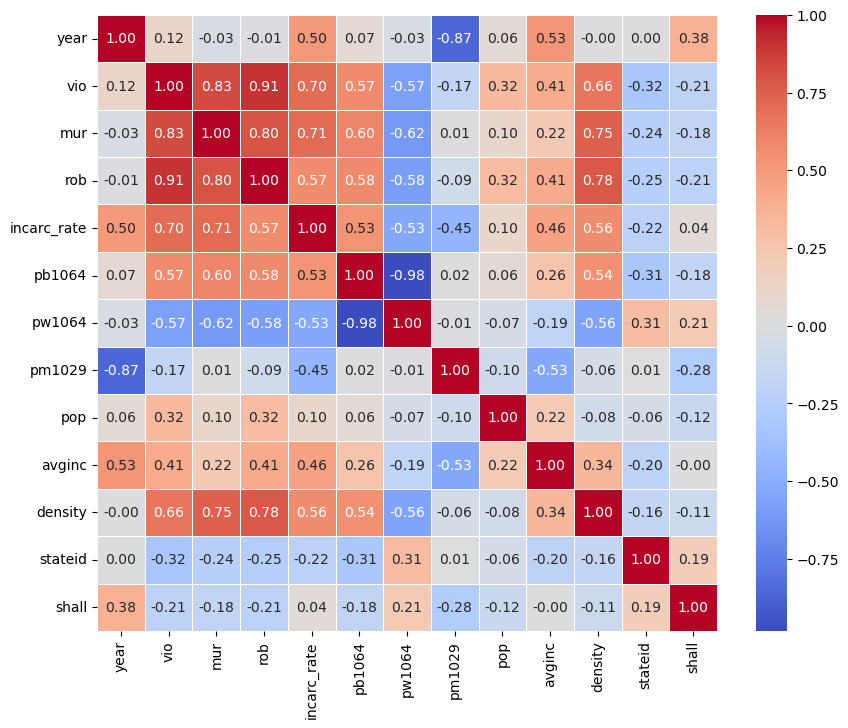

In [4]:
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Show the plot
plt.show()


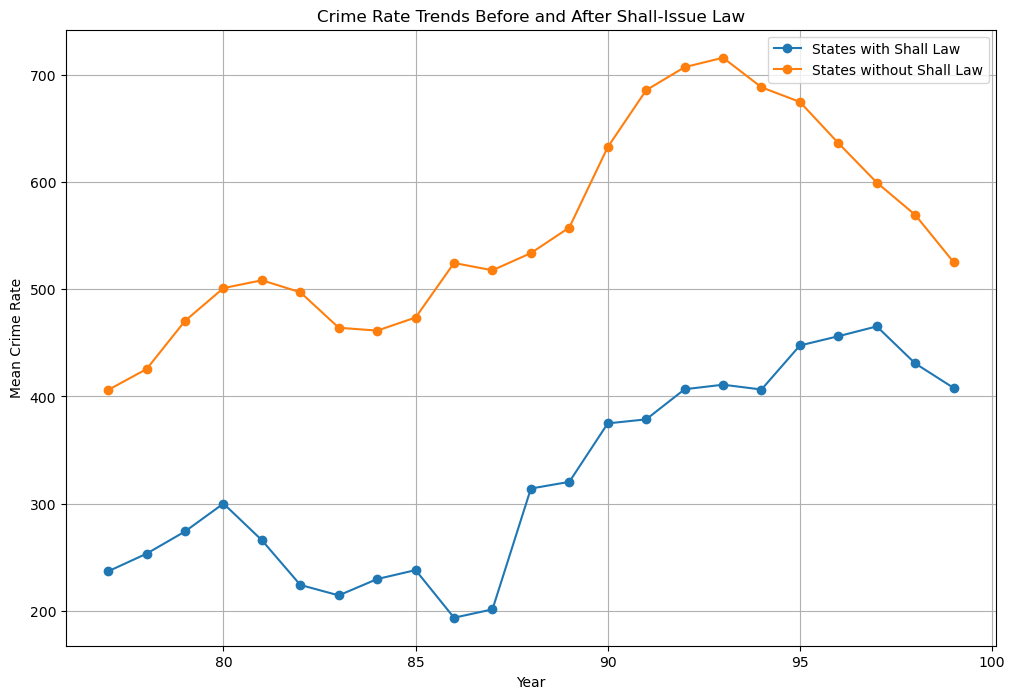

In [5]:
shall_law_df = df[df['shall'] == 1]  # Subset of data with shall laws
no_shall_law_df = df[df['shall'] == 0]  # Subset of data without shall laws

# Calculate the mean crime rate for each year for states with and without shall laws
shall_law_mean = shall_law_df.groupby('year')['vio'].mean()
no_shall_law_mean = no_shall_law_df.groupby('year')['vio'].mean()

# Plotting the comparison
plt.figure(figsize=(12, 8))

plt.plot(shall_law_mean.index, shall_law_mean.values, label='States with Shall Law', marker='o')
plt.plot(no_shall_law_mean.index, no_shall_law_mean.values, label='States without Shall Law', marker='o')

plt.title('Crime Rate Trends Before and After Shall-Issue Law')
plt.xlabel('Year')
plt.ylabel('Mean Crime Rate')
plt.legend()
plt.grid(True)
plt.show()


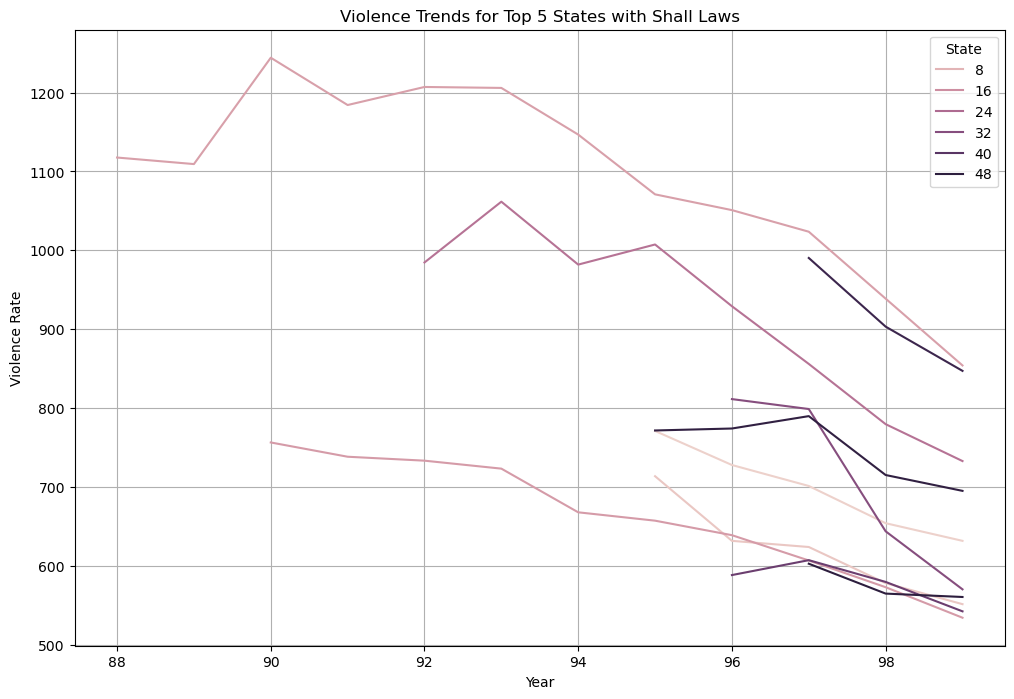

In [6]:
# Calculate the mean crime rate for each year for states with and without shall laws
shall_law_mean = df[df['shall'] == 1].groupby(['year', 'stateid'])['vio'].mean().reset_index()

# Select the top 5 states based on the mean crime rate
top_5_states_with_shall_law = shall_law_mean.groupby('stateid')['vio'].mean().nlargest(10).index

# Filter the data for the top 5 states
top_5_states_with_shall_law_data = shall_law_mean[shall_law_mean['stateid'].isin(top_5_states_with_shall_law)]

# Plotting the comparison for states with shall laws
plt.figure(figsize=(12, 8))
sns.lineplot(x='year', y='vio', hue='stateid', data=top_5_states_with_shall_law_data)
plt.title('Violence Trends for Top 5 States with Shall Laws')
plt.xlabel('Year')
plt.ylabel('Violence Rate')
plt.legend(title='State')
plt.grid(True)
plt.show()


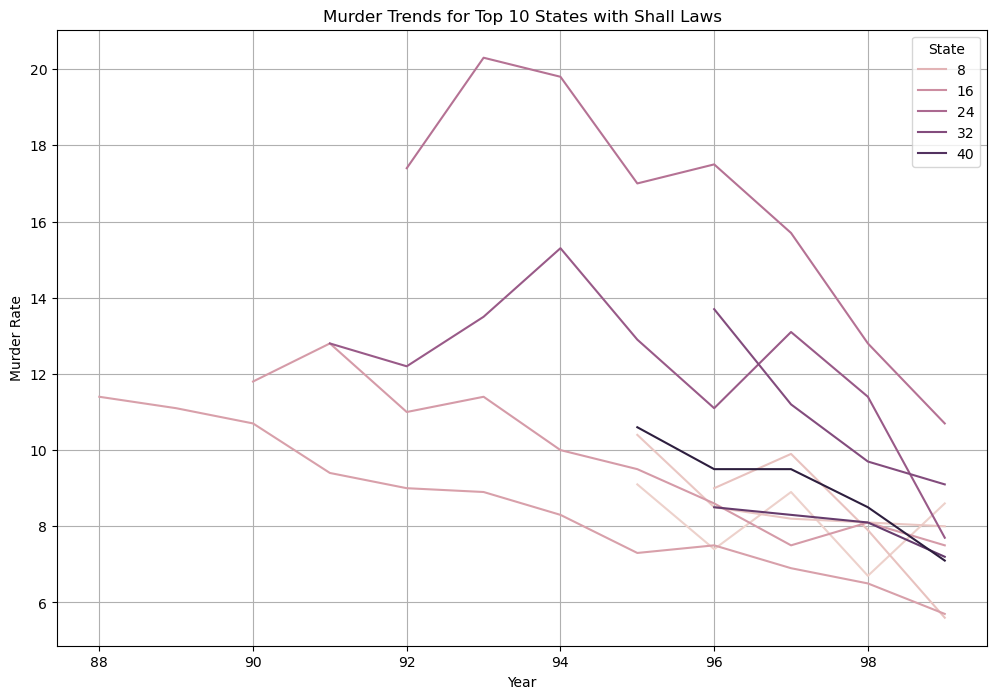

In [7]:
# Calculate the mean crime rate for each year for states with and without shall laws
shall_law_mean = df[df['shall'] == 1].groupby(['year', 'stateid'])['mur'].mean().reset_index()

# Select the top 5 states based on the mean crime rate
top_5_states_with_shall_law = shall_law_mean.groupby('stateid')['mur'].mean().nlargest(10).index

# Filter the data for the top 5 states
top_5_states_with_shall_law_data = shall_law_mean[shall_law_mean['stateid'].isin(top_5_states_with_shall_law)]

# Plotting the comparison for states with shall laws
plt.figure(figsize=(12, 8))
sns.lineplot(x='year', y='mur', hue='stateid', data=top_5_states_with_shall_law_data)
plt.title('Murder Trends for Top 10 States with Shall Laws')
plt.xlabel('Year')
plt.ylabel('Murder Rate')
plt.legend(title='State')
plt.grid(True)
plt.show()


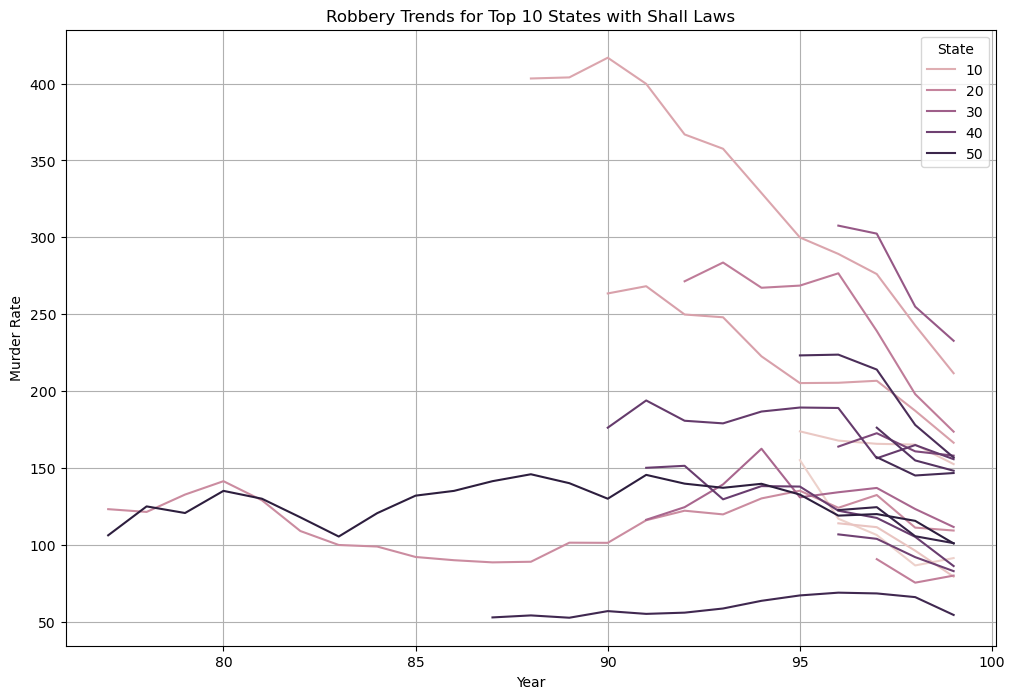

In [8]:
# Calculate the mean crime rate for each year for states with and without shall laws
shall_law_mean = df[df['shall'] == 1].groupby(['year', 'stateid'])['rob'].mean().reset_index()

# Select the top 5 states based on the mean crime rate
top_5_states_with_shall_law = shall_law_mean.groupby('stateid')['rob'].mean().nlargest(20).index

# Filter the data for the top 5 states
top_5_states_with_shall_law_data = shall_law_mean[shall_law_mean['stateid'].isin(top_5_states_with_shall_law)]

# Plotting the comparison for states with shall laws
plt.figure(figsize=(12, 8))
sns.lineplot(x='year', y='rob', hue='stateid', data=top_5_states_with_shall_law_data)
plt.title('Robbery Trends for Top 10 States with Shall Laws')
plt.xlabel('Year')
plt.ylabel('Murder Rate')
plt.legend(title='State')
plt.grid(True)
plt.show()

In [9]:
columns_to_transform = ['vio', 'mur', 'rob']
df[columns_to_transform] = np.log(df[columns_to_transform])
df.head()

,year,vio,mur,rob,incarc_rate,pb1064,pw1064,pm1029,pop,avginc,density,stateid,shall
0,77,6.026832,2.653242,4.572647,83,8.384873,55.122906,18.174412,3.780403,9.563148,0.074552,1,0
1,78,6.038110,2.587764,4.596129,94,8.352101,55.143665,17.994080,3.831838,9.932000,0.075567,1,0
2,79,6.024174,2.580217,4.695925,144,8.329575,55.135857,17.839336,3.866248,9.877028,0.076245,1,0
3,80,6.105909,2.580217,4.883559,141,8.408386,54.912586,17.734198,3.900368,9.541428,0.076829,1,0
4,81,6.153796,2.476538,4.840242,149,8.483435,54.925125,17.673716,3.918531,9.548351,0.077187,1,0


array([[<Axes: title={'center': 'vio'}>, <Axes: title={'center': 'mur'}>],
       [<Axes: title={'center': 'rob'}>, <Axes: >]], dtype=object)

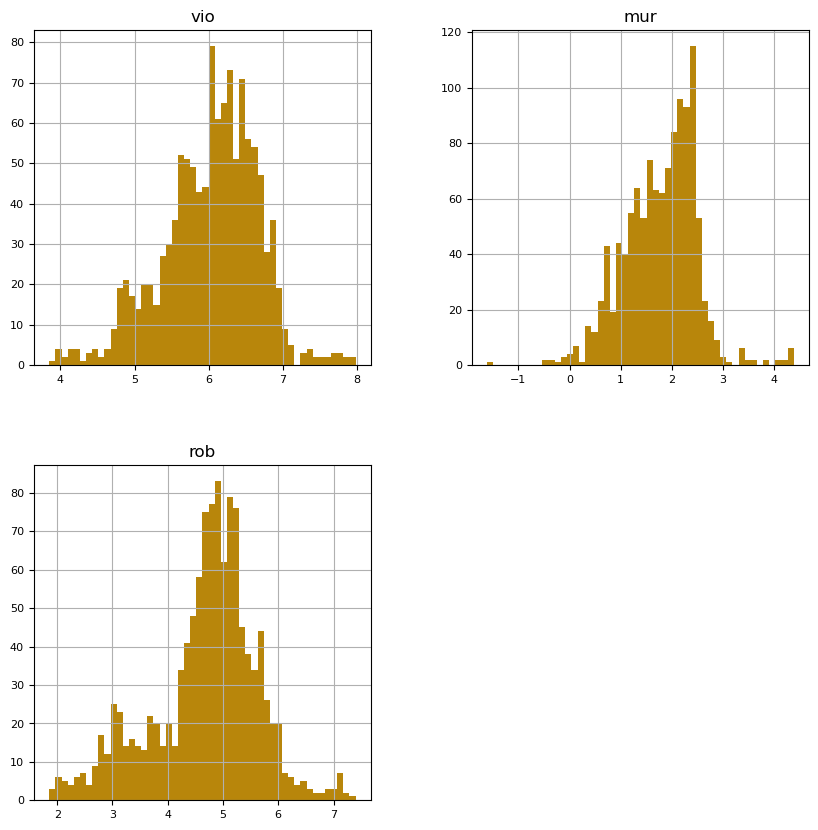

In [10]:
df[['vio', 'mur', 'rob']].hist(figsize=(10, 10), bins=50, xlabelsize=8, ylabelsize=8, color= 'darkgoldenrod')

In [11]:
model_1 = sm.ols("vio ~ incarc_rate + pb1064 + pw1064 + pm1029 + pop + avginc + density + stateid + shall + year", data = df).fit()
print (model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    vio   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     169.5
Date:                Fri, 15 Dec 2023   Prob (F-statistic):          6.60e-219
Time:                        09:05:37   Log-Likelihood:                -623.27
No. Observations:                1173   AIC:                             1269.
Df Residuals:                    1162   BIC:                             1324.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       5.4320      0.683      7.957      

In [12]:
model_2 = sm.ols("vio ~ incarc_rate + pb1064 + pm1029 + pop + avginc + density + shall+ year + incarc_rate:shall + pb1064:shall + pm1029:shall + pop:shall + avginc:shall + density:shall + year:shall", data = df).fit()
print (model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    vio   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     117.3
Date:                Fri, 15 Dec 2023   Prob (F-statistic):          1.09e-219
Time:                        09:05:37   Log-Likelihood:                -608.66
No. Observations:                1173   AIC:                             1249.
Df Residuals:                    1157   BIC:                             1330.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             7.4850      0.75

In [13]:
White_test = het_white(model_1.resid,  model_1.model.exog)
test_l = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(test_l, White_test)))

{'Test Statistic': 670.1029533572652, 'Test Statistic p-value': 7.842386459054993e-102, 'F-Statistic': 23.068652833507844, 'F-Test p-value': 1.6767713900736563e-160}


In [14]:
model_3 = sm.ols("vio ~ incarc_rate + pb1064 + pw1064 + pm1029 + pop + avginc + density + shall", data = df).fit(cov_type = "HC0")
print (model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    vio   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     96.40
Date:                Fri, 15 Dec 2023   Prob (F-statistic):          6.77e-123
Time:                        09:05:37   Log-Likelihood:                -663.61
No. Observations:                1173   AIC:                             1345.
Df Residuals:                    1164   BIC:                             1391.
Df Model:                           8                                         
Covariance Type:                  HC0                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.9817      0.607      4.915      

In [15]:
df.head()

,year,vio,mur,rob,incarc_rate,pb1064,pw1064,pm1029,pop,avginc,density,stateid,shall
0,77,6.026832,2.653242,4.572647,83,8.384873,55.122906,18.174412,3.780403,9.563148,0.074552,1,0
1,78,6.038110,2.587764,4.596129,94,8.352101,55.143665,17.994080,3.831838,9.932000,0.075567,1,0
2,79,6.024174,2.580217,4.695925,144,8.329575,55.135857,17.839336,3.866248,9.877028,0.076245,1,0
3,80,6.105909,2.580217,4.883559,141,8.408386,54.912586,17.734198,3.900368,9.541428,0.076829,1,0
4,81,6.153796,2.476538,4.840242,149,8.483435,54.925125,17.673716,3.918531,9.548351,0.077187,1,0


In [16]:
df = df.set_index(['stateid','year'])

In [17]:
df.head()

vio       mur       rob  incarc_rate    pb1064     pw1064  \
stateid year                                                                   
1       77    6.026832  2.653242  4.572647           83  8.384873  55.122906   
        78    6.038110  2.587764  4.596129           94  8.352101  55.143665   
        79    6.024174  2.580217  4.695925          144  8.329575  55.135857   
        80    6.105909  2.580217  4.883559          141  8.408386  54.912586   
        81    6.153796  2.476538  4.840242          149  8.483435  54.925125   

                 pm1029       pop    avginc   density  shall  
stateid year                                                  
1       77    18.174412  3.780403  9.563148  0.074552      0  
        78    17.994080  3.831838  9.932000  0.075567      0  
        79    17.839336  3.866248  9.877028  0.076245      0  
        80    17.734198  3.900368  9.541428  0.076829      0  
        81    17.673716  3.918531  9.548351  0.077187      0

In [19]:
var = df[['incarc_rate', 'pb1064', 'pw1064', 'pm1029', 'pop', 'avginc', 'density', 'shall']]
var = add_constant(var)
model4 = PanelOLS(df.vio, var, entity_effects=True)
res4 = model4.fit(cov_type='kernel')
res4

Dep. Variable:,vio,R-squared:,0.2178
Estimator:,PanelOLS,R-squared (Between):,-0.1777
No. Observations:,1173,R-squared (Within):,0.2178
Date:,"Fri, Dec 15 2023",R-squared (Overall):,-0.1480
Time:,09:29:56,Log-likelihood,510.18
Cov. Estimator:,Driscoll-Kraay,,
,,F-statistic:,38.772
Entities:,51,P-value,0.0000
Avg Obs:,23.000,Distribution:,"F(8,1114)"
Min Obs:,23.000,,
Max Obs:,23.000,F-statistic (robust):,38.234


In [27]:
df.reset_index(inplace=True)

In [31]:
df.tail()

,stateid,year,vio,mur,rob,incarc_rate,pb1064,pw1064,pm1029,pop,avginc,density,shall
1168,56,95,5.538121,0.741937,2.884801,254,1.485849,73.716209,15.370982,0.478447,14.070156,0.004927,1
1169,56,96,5.520260,1.193922,3.015535,289,1.521814,73.857964,15.446014,0.480085,14.032229,0.004944,1
1170,56,97,5.542048,1.252763,2.873565,310,1.527818,73.927307,15.493999,0.480031,14.790977,0.004943,1
1171,56,98,5.511815,1.568616,2.785011,326,1.558396,73.985146,15.510213,0.480045,15.225509,0.004944,1
1172,56,99,5.448030,0.832909,2.734367,327,1.613004,74.049522,15.480127,0.479602,15.765074,0.004939,1


In [29]:
data_onehot = df['year']

In [30]:
data_onehot_reshaped = np.array(data_onehot).reshape(-1, 1)

enc = OneHotEncoder(sparse=False)
enc.fit(data_onehot_reshaped)
data_onehot_transformed = enc.transform(data_onehot_reshaped)


In [36]:
numbers = ["'" + str(num) + "'" for num in range(77, 100)]
series_text = ', '.join(numbers)
print(series_text)


'77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99'


In [37]:
cols = ['77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99']

data2 = pd.DataFrame(data_onehot_transformed, columns = cols)
data2.head()

,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
df1 = pd.concat([df, data2], axis = 1)
df1 = df1.set_index(['stateid', 'year'])

In [39]:
df1.head()

vio       mur       rob  incarc_rate    pb1064     pw1064  \
stateid year                                                                   
1       77    6.026832  2.653242  4.572647           83  8.384873  55.122906   
        78    6.038110  2.587764  4.596129           94  8.352101  55.143665   
        79    6.024174  2.580217  4.695925          144  8.329575  55.135857   
        80    6.105909  2.580217  4.883559          141  8.408386  54.912586   
        81    6.153796  2.476538  4.840242          149  8.483435  54.925125   

                 pm1029       pop    avginc   density  shall   77   78   79  \
stateid year                                                                  
1       77    18.174412  3.780403  9.563148  0.074552      0  1.0  0.0  0.0   
        78    17.994080  3.831838  9.932000  0.075567      0  0.0  1.0  0.0   
        79    17.839336  3.866248  9.877028  0.076245      0  0.0  0.0  1.0   
        80    17.734198  3.900368  9.541428  0.076829      0  0.0  0.0  0.0   
        81    17.673716  3.918531  9.548351  0.077187      0  0.0  0.0  0.0   

               80   81   82   83   84   85   86   87   88   89   90   91   92  \
stateid year                                                                    
1       77    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
        78    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
        79    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
        80    1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
        81    0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

               93   94   95   96   97   98   99  
stateid year                                     
1       77    0.0  0.0  0.0  0.0  0.0  0.0  0.0  
        78    0.0  0.0  0.0  0.0  0.0  0.0  0.0  
        79    0.0  0.0  0.0  0.0  0.0  0.0  0.0  
        80    0.0  0.0  0.0  0.0  0.0  0.0  0.0  
        81    0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [40]:
X = df1[['incarc_rate', 'pb1064', 'pw1064', 'pm1029', 'pop', 'avginc', 'density', 'shall', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99']]
X = add_constant(X)

In [42]:
model5 = PanelOLS(df1.vio, X, check_rank=False, drop_absorbed=True)
res5 = model5.fit(cov_type='kernel')
res5

Dep. Variable:,vio,R-squared:,0.5922
Estimator:,PanelOLS,R-squared (Between):,0.6719
No. Observations:,1173,R-squared (Within):,-0.3866
Date:,"Fri, Dec 15 2023",R-squared (Overall):,0.5922
Time:,10:01:59,Log-likelihood,-624.74
Cov. Estimator:,Driscoll-Kraay,,
,,F-statistic:,55.278
Entities:,51,P-value,0.0000
Avg Obs:,23.000,Distribution:,"F(30,1142)"
Min Obs:,23.000,,
Max Obs:,23.000,F-statistic (robust):,-1.671e+16
